In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-5000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [73]:
N_queries = 100

Ls = [0, 2, 4, 8, 16, 32, 64] #number of neighbors to make candidates
bs = [200] #hash bits
es = [4, 2.7, 2.1, 1.7, 1.5, 1.3] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, [0, 2, 4, 8, 16, 32, 64]
bs, [200]
es, [4, 2.7, 2.1, 1.7, 1.5, 1.3]
Ms, [11, 20, 31, 47, 60, 81]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    11,     0,    0.651,    0.767
     0,      0,      1,   200,   4.0,    11,     2,    0.684,    0.882
     0,      0,      2,   200,   4.0,    11,     4,    0.770,    0.905
     0,      0,      3,   200,   4.0,    11,     8,    1.027,    0.930
     0,      0,      4,   200,   4.0,    11,    16,    1.555,    0.944
     0,      0,      5,   200,   4.0,    11,    32,    1.852,    0.970
     0,      0,      6,   200,   4.0,    11,    64,    4.497,    0.981
     0,      1,      0,   200,   2.7,    20,     0,    0.969,    0.805
     0,      1,      1,   200,   2.7,    20,     2,    1.159,    0.889
     0,      1,      2,   200,   2.7,    20,     4,    1.168,    0.923
     0,      1,      3,   200,   2.7,    20,     8,    1.932,    0.948
     0,      1,    

Optimal points
  b,   e,  M,  L,    t,  ndgc
200, 4.0, 11,  0, 0.65, 0.767
200, 4.0, 11,  2, 0.68, 0.882
200, 4.0, 11,  8, 1.03, 0.930
200, 2.7, 20,  2, 1.16, 0.889
200, 2.7, 20,  4, 1.17, 0.923
200, 2.7, 20,  8, 1.93, 0.948
200, 2.1, 31, 64,10.21, 0.997
200, 1.7, 47,  2, 2.65, 0.956
200, 1.7, 47, 64,12.17, 1.000
200, 1.5, 60,  0, 2.30, 0.868
200, 1.5, 60, 16, 6.56, 0.989
200, 1.5, 60, 32,12.08, 0.997
200, 1.3, 81,  0, 2.75, 0.908
200, 1.3, 81,  2, 3.79, 0.963
200, 1.3, 81,  8, 6.53, 0.989
200, 1.3, 81, 32,12.00, 0.999


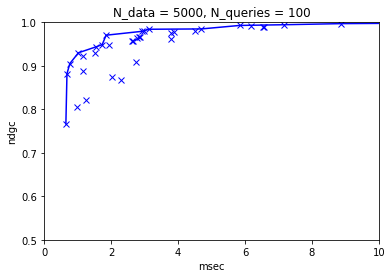

In [74]:
axlims = [0, 10, 0.5, 1]
idxs = plot_search(results, N_data, N_queries, axlims)

# Vary b

In [33]:
N_queries = 10

bs = range(5, 250, 20)
es = [4, 2] #error tolerance
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, [1, 6]
bs, range(5, 250, 20)
es, [4, 2]
Ms, [11, 34]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,     5,   4.0,    11,     1,    0.412,    0.753
     0,      0,      1,     5,   4.0,    11,     6,    0.611,    0.828
     0,      1,      0,     5,   2.0,    34,     1,    1.073,    0.811
     0,      1,      1,     5,   2.0,    34,     6,    2.050,    0.893
     1,      0,      0,    25,   4.0,    11,     1,    0.429,    0.787
     1,      0,      1,    25,   4.0,    11,     6,    0.540,    0.882
     1,      1,      0,    25,   2.0,    34,     1,    0.972,    0.842
     1,      1,      1,    25,   2.0,    34,     6,    1.605,    0.914
     2,      0,      0,    45,   4.0,    11,     1,    0.528,    0.797
     2,      0,      1,    45,   4.0,    11,     6,    0.572,    0.882
     2,      1,      0,    45,   2.0,    34,     1,    1.000,    0.914
     2,      1,      1,    45,   2.0,    34,     6,    1.478,  

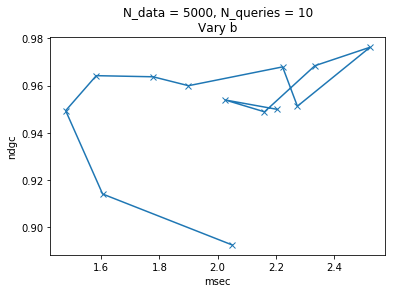

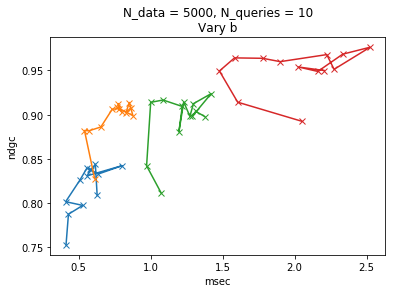

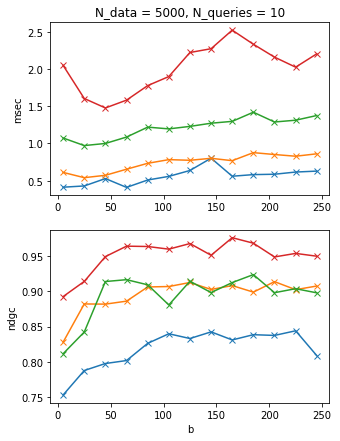

In [34]:
plot_param_search(results, 0, N_data, N_queries)

# Vary eps

In [29]:
N_queries = 200

bs = [200]
es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5, 1.3, 1.0]
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, [1, 6]
bs, [200]
es, [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5, 1.3, 1.0]
Ms, [5, 11, 20, 29, 38, 47, 60, 81, 141]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   9.0,     5,     1,    0.388,    0.755
     0,      0,      1,   200,   9.0,     5,     6,    0.523,    0.839
     0,      1,      0,   200,   4.0,    11,     1,    0.613,    0.836
     0,      1,      1,   200,   4.0,    11,     6,    0.812,    0.923
     0,      2,      0,   200,   2.7,    20,     1,    0.970,    0.855
     0,      2,      1,   200,   2.7,    20,     6,    1.705,    0.929
     0,      3,      0,   200,   2.2,    29,     1,    1.203,    0.901
     0,      3,      1,   200,   2.2,    29,     6,    2.069,    0.967
     0,      4,      0,   200,   1.9,    38,     1,    1.414,    0.920
     0,      4,      1,   200,   1.9,    38,     6,    2.928,    0.979
     0,      5,      0,   200,   1.7,    47,     1,    2.074,    0.930
     0,     

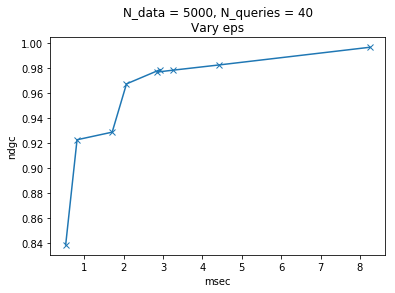

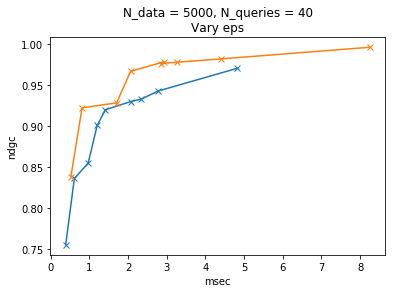

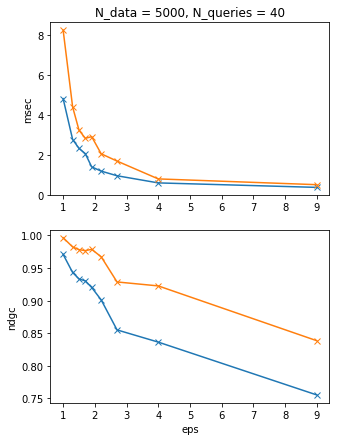

In [30]:
plot_param_search(results, 1, N_data, N_queries)

# Vary L

In [31]:
N_queries = 200

bs = [200]
es = [4, 2] #error tolerance
Ls = range(0, 20, 1) #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, range(0, 20)
bs, [200]
es, [4, 2]
Ms, [11, 34]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    11,     0,    0.638,    0.736
     0,      0,      1,   200,   4.0,    11,     1,    0.765,    0.828
     0,      0,      2,   200,   4.0,    11,     2,    0.871,    0.864
     0,      0,      3,   200,   4.0,    11,     3,    0.726,    0.891
     0,      0,      4,   200,   4.0,    11,     4,    0.852,    0.900
     0,      0,      5,   200,   4.0,    11,     5,    0.871,    0.913
     0,      0,      6,   200,   4.0,    11,     6,    0.924,    0.914
     0,      0,      7,   200,   4.0,    11,     7,    1.358,    0.919
     0,      0,      8,   200,   4.0,    11,     8,    1.169,    0.928
     0,      0,      9,   200,   4.0,    11,     9,    1.099,    0.929
     0,      0,     10,   200,   4.0,    11,    10,    1.166,    0.930
     0,      0,     11,   200,   4.0,    11,    11,    1.444,    0.93

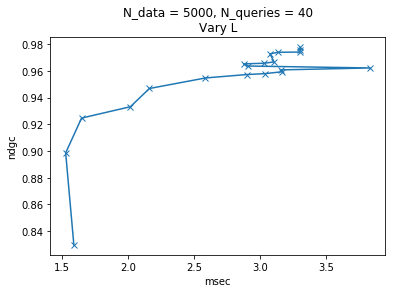

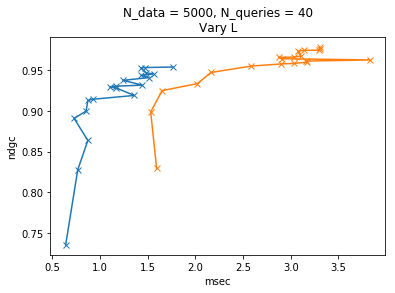

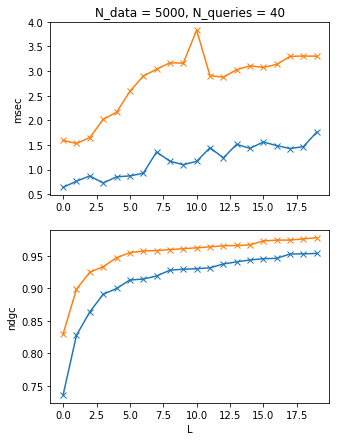

In [32]:
plot_param_search(results, 2, N_data, N_queries)